Simulates a 2‑D Ising ferromagnet on an N×N lattice and visualizes how magnetization and energy evolve under a Metropolis–Hastings Monte Carlo sweep at different temperatures. Initializes the spin lattice, defines the Hamiltonian, runs the Metropolis sampler, and plots the resulting spin averages and energies for comparison.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

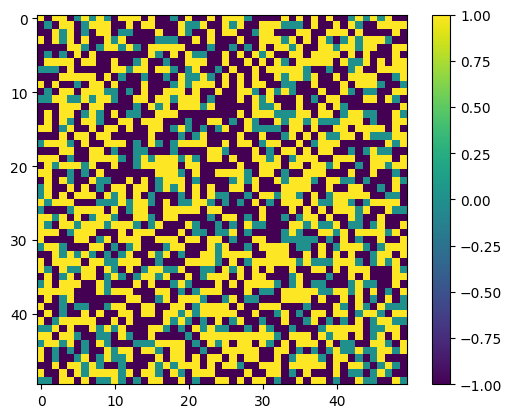

In [21]:
N = 50
init_random = np.random.random((N,N))
lattice = np.zeros((N, N))
lattice[init_random>=0.6] = 1
lattice[init_random<0.4] = -1
plt.imshow(lattice) 
plt.colorbar()

### Lattice Energy
- Computes the Hamiltonian of the 2‑D Ising lattice by summing nearest-neighbour spin interactions.
$$
  E = -\tfrac{1}{2}\sum_{i,j} s_{i,j}\big(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1}\big)
$$
  where $(s_{i,j}\in\{-1,+1\})$. The factor $(\tfrac{1}{2})$ prevents double-counting of bonds.
- Iterates over interior lattice sites, accumulates the local energy contributions, and returns the scalar total \(E\).


In [22]:
def get_energy(lattice):
    E = np.zeros((N, N))
    for i in range(1,N-1):
        for j in range(1,N-1):
            E[i][j] = -(1/2)*lattice[i,j]*(lattice[i+1,j]
                                           +lattice[i-1,j]
                                           +lattice[i,j+1]
                                           +lattice[i,j-1]) 
    return E.sum()

In [23]:
get_energy(lattice) 

np.float64(7.5)

### Metropolis algorithm
Implements one Monte Carlo sweep using the Metropolis–Hastings acceptance criterion at inverse temperature $(\beta J)$.\
For each step:
- Randomly choose lattice site $(x,y)$ and propose flipping $(s_{x,y}\rightarrow -s_{x,y})$.
- Compute the local energy change  
$$\Delta E = 2\,s_{x,y} \sum_{(x',y')\in\mathcal{N}(x,y)} s_{x',y'}$$
where $\mathcal{N}(x,y)$ is the nearest neighbours.
- Accept the flip with probability $\min\{1, \exp(-\beta J\,\Delta E)\}$

In [24]:
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    
    for t in range(times-1):
        # pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        
        spin_i = spin_arr[x,y] #initial spin at selected x,y
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
            
    # change state with designated probabilities
        dE = E_f - E_i
        if (dE>0):
            if np.random.random() < np.exp(-BJ*dE):
                spin_arr[x,y]=spin_f
                energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
            
    return net_spins, net_energy

In [29]:
spins_low_temp, energies_low_temp = metropolis(lattice, 10000000, 0.7, get_energy(lattice))

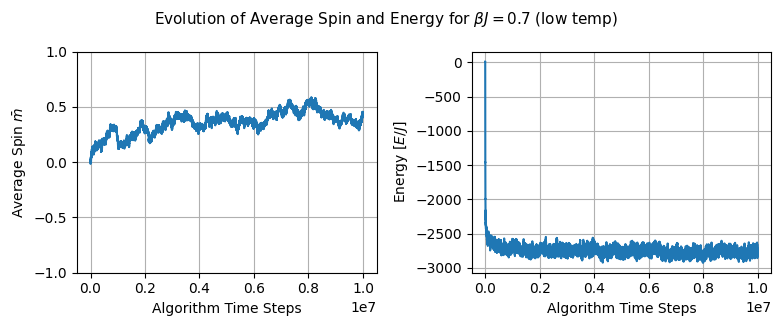

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
ax = axes[0]
ax.plot(spins_low_temp/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax.set_ylim([-1, 1])
ax = axes[1]
ax.plot(energies_low_temp)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $[E/J]$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.7 (low temp)', y=1.07, size=11)
plt.show()

In [31]:
spins_high_temp, energies_high_temp = metropolis(lattice, 10000000, 0.2, get_energy(lattice))

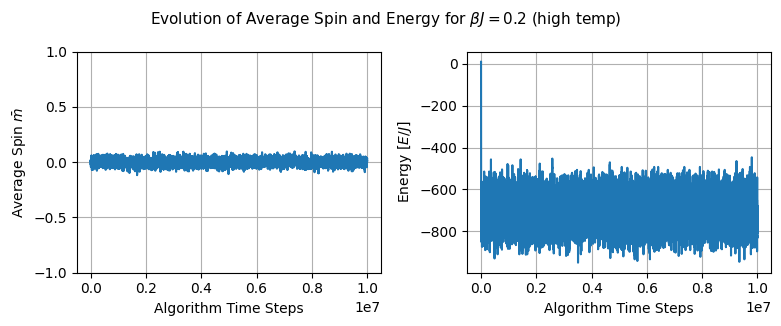

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
ax = axes[0]
ax.plot(spins_high_temp/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax.set_ylim([-1, 1])
ax = axes[1]
ax.plot(energies_high_temp)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $[E/J]$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.2 (high temp)', y=1.07, size=11)
plt.show()